<a href="https://colab.research.google.com/github/sanketme/DCSC/blob/main/DCSC12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This file has an analysis of SD models which are stored in Drive as DCSC12. The files are different in the sense that they have different *demand patterns viz. constant demand, constant plus step change in demand, Pulse increase and decrease, random fluctuation* in a given range of demand for a short period of time.  

The file uses PySD to analyse following components:
1. CCC of three players Manufacturer (M), Wholesaler (W) and Retailer (R)
2. Order rate for W and R and production rate for M

The above components help us observe BWE and CFB for different players under different demand condition.

Observations are written at the last section of this file.

installing packages and running the model

In [ ]:
%%capture
!pip install -U ema_workbench[all]

In [ ]:
!pip -q install pySD
# !pip -q install ema_workbench
# !pip -q install netCDF4

import numpy as np
import pandas as pd
from pysd import *
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 11.2 MB/s eta 0:00:00


# 1. ConstantDemand

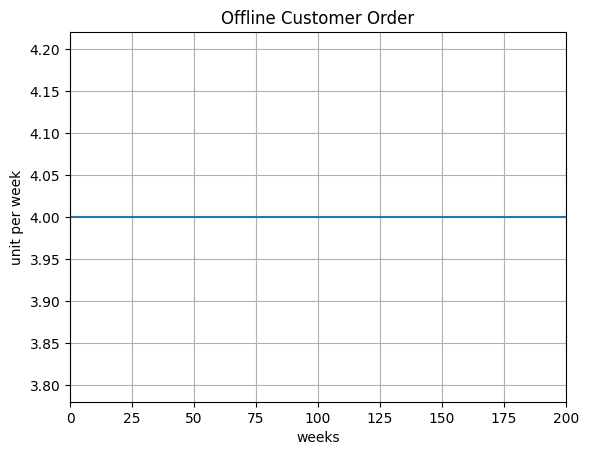

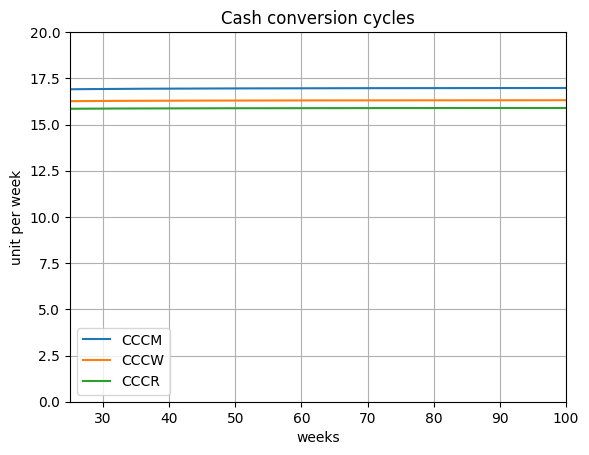

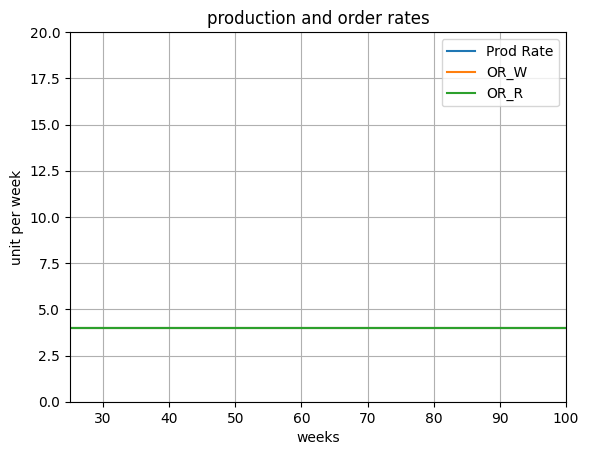

variance of CCC and  production or order rate CCCM                              0.000144
CCCW                              0.000082
CCCR                              0.000053
production rate                   0.000000
OrderRateW                        0.000000
OrderRateR                        0.000000
wholesaler amount to order WOP    0.000000
retailer amount to order ROP      0.000000
Offline Customer Order            0.000000
dtype: float64
Cash flow bullwhip and BWE values
CFB_M=  inf
CFB_W=  inf
CFB_R=  inf
BWE_M=  nan
BWE_W=  nan
BWE_R=  nan


<ipython-input-3-1c95271f0d23>:42: RuntimeWarning: divide by zero encountered in scalar divide
  CFB_M = var_data_CD['CCCM'] / var_data_CD['wholesaler amount to order WOP']
<ipython-input-3-1c95271f0d23>:43: RuntimeWarning: divide by zero encountered in scalar divide
  CFB_W = var_data_CD['CCCW'] / var_data_CD['retailer amount to order ROP']
<ipython-input-3-1c95271f0d23>:44: RuntimeWarning: divide by zero encountered in scalar divide
  CFB_R = var_data_CD['CCCR'] / var_data_CD['Offline Customer Order']
<ipython-input-3-1c95271f0d23>:45: RuntimeWarning: invalid value encountered in scalar divide
  BWE_M = var_data_CD['production rate'] / var_data_CD['wholesaler amount to order WOP']
<ipython-input-3-1c95271f0d23>:46: RuntimeWarning: invalid value encountered in scalar divide
  BWE_W = var_data_CD['OrderRateW'] / var_data_CD['retailer amount to order ROP']
<ipython-input-3-1c95271f0d23>:47: RuntimeWarning: invalid value encountered in scalar divide
  BWE_R = var_data_CD['OrderRateR'] / 

In [ ]:
vmodel_CD = pysd.read_vensim('DCSC12ConstantDemand.mdl')
temp_CD = vmodel_CD.run()
#let's have a look at the demand
temp_CD["Offline Customer Order"].plot()
plt.title("Offline Customer Order")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.xlim(0, 200) # Set x-axis limits
plt.show()
#storing the data in another series data_CD
data_CD = vmodel_CD.run(return_columns=['CCCM', 'CCCW', 'CCCR','production rate', 'OrderRateW','OrderRateR', 'wholesaler amount to order WOP', 'retailer amount to order ROP', 'Offline Customer Order' ])
temp_CD["CCCM"].plot(label='CCCM')
temp_CD["CCCW"].plot(label='CCCW')
temp_CD["CCCR"].plot(label='CCCR')
plt.title("Cash conversion cycles")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(00, 20)  # Set y-axis limits
plt.xlim(25, 100) # Set x-axis limits
plt.show()

temp_CD["production rate"].plot(label='Prod Rate')
temp_CD["OrderRateW"].plot(label='OR_W')
temp_CD["OrderRateR"].plot(label='OR_R')
plt.title("production and order rates")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(00, 20)  # Set y-axis limits
plt.xlim(25, 100) # Set x-axis limits
plt.show()

#we cut down the dataset from certain rows to till certain other rows in the datasubset pandas series
data_subsetCD = data_CD.iloc[38:200] # taking 38 weeks as warmup period
# print(data_subsetRN)
var_data_CD = data_subsetCD.var()
print("variance of CCC and  production or order rate", var_data_CD)
CFB_M = var_data_CD['CCCM'] / var_data_CD['wholesaler amount to order WOP']
CFB_W = var_data_CD['CCCW'] / var_data_CD['retailer amount to order ROP']
CFB_R = var_data_CD['CCCR'] / var_data_CD['Offline Customer Order']
BWE_M = var_data_CD['production rate'] / var_data_CD['wholesaler amount to order WOP']
BWE_W = var_data_CD['OrderRateW'] / var_data_CD['retailer amount to order ROP']
BWE_R = var_data_CD['OrderRateR'] / var_data_CD['Offline Customer Order']
print("Cash flow bullwhip and BWE values")
print('CFB_M= ', CFB_M)
print('CFB_W= ', CFB_W)
print('CFB_R= ', CFB_R)
print('BWE_M= ', BWE_M)
print('BWE_W= ', BWE_W)
print('BWE_R= ', BWE_R)

#2. StepDemand

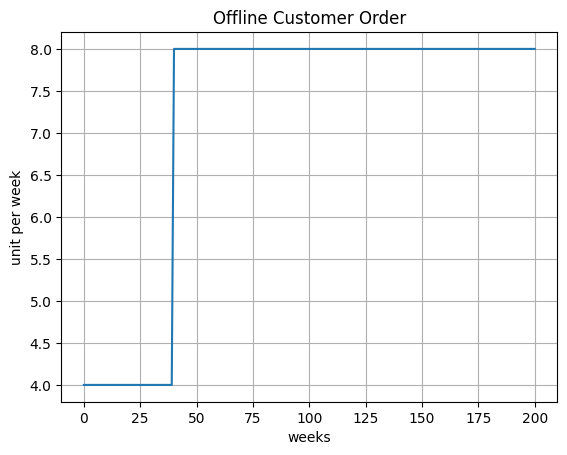

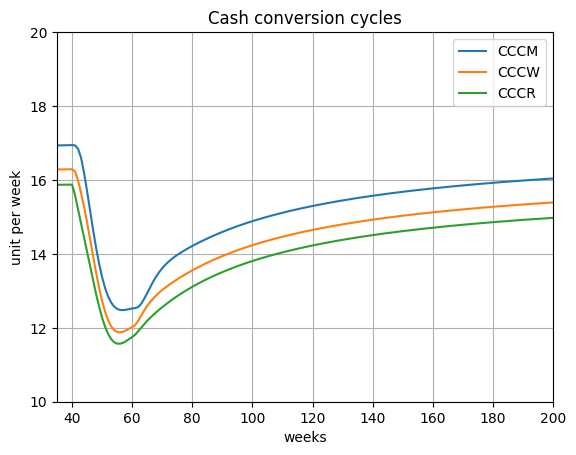

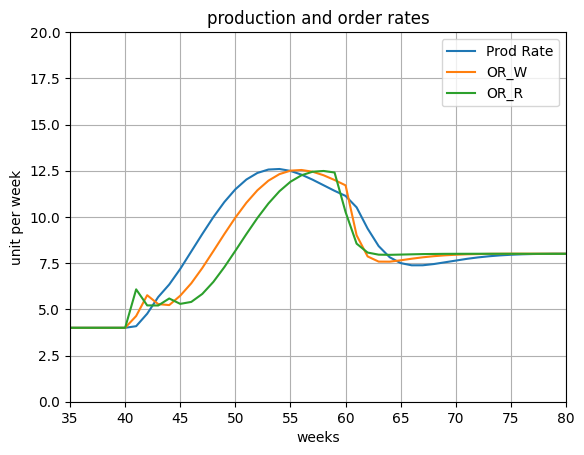

variance of CCC and  production or order rate
CCCM                              1.158978
CCCW                              1.074226
CCCR                              1.030676
production rate                   1.745327
OrderRateW                        1.585693
OrderRateR                        1.345233
wholesaler amount to order WOP    1.100900
retailer amount to order ROP      0.572643
Offline Customer Order            0.196304
dtype: float64
Cash flow bullwhip and BWE values
CFB_M=  1.0527545348318048
CFB_W=  1.8759106556911351
CFB_R=  5.250406717939266
BWE_M=  1.585363815572265
BWE_W=  2.769079497243336
BWE_R=  6.852805900028944


In [ ]:
vmodel_SD = pysd.read_vensim('DCSC12StepDemand.mdl')
temp_SD = vmodel_SD.run()
# import matplotlib.pyplot as plt
temp_SD["Offline Customer Order"].plot()
plt.title("Offline Customer Order")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.show()

#storing the data in another series data_SD
data_SD = vmodel_SD.run(return_columns=['CCCM', 'CCCW', 'CCCR','production rate', 'OrderRateW','OrderRateR', 'wholesaler amount to order WOP', 'retailer amount to order ROP', 'Offline Customer Order' ])
temp_SD["CCCM"].plot(label='CCCM')
temp_SD["CCCW"].plot(label='CCCW')
temp_SD["CCCR"].plot(label='CCCR')
plt.title("Cash conversion cycles")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(10, 20)  # Set y-axis limits
plt.xlim(35, 200) # Set x-axis limits
plt.show()

temp_SD["production rate"].plot(label='Prod Rate')
temp_SD["OrderRateW"].plot(label='OR_W')
temp_SD["OrderRateR"].plot(label='OR_R')
plt.title("production and order rates")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(00, 20)  # Set y-axis limits
plt.xlim(35, 80) # Set x-axis limits
plt.show()



#we cut down the dataset from certain rows to till certain other rows in the datasubset pandas series
data_subsetSD = data_SD.iloc[38:200]
# print(data_subsetRN)
var_data_SD = data_subsetSD.var()
print("""variance of CCC and  production or order rate""")
print(var_data_SD)
CFB_M = var_data_SD['CCCM'] / var_data_SD['wholesaler amount to order WOP']
CFB_W = var_data_SD['CCCW'] / var_data_SD['retailer amount to order ROP']
CFB_R = var_data_SD['CCCR'] / var_data_SD['Offline Customer Order']
BWE_M = var_data_SD['production rate'] / var_data_SD['wholesaler amount to order WOP']
BWE_W = var_data_SD['OrderRateW'] / var_data_SD['retailer amount to order ROP']
BWE_R = var_data_SD['OrderRateR'] / var_data_SD['Offline Customer Order']
print("Cash flow bullwhip and BWE values")
print('CFB_M= ', CFB_M)
print('CFB_W= ', CFB_W)
print('CFB_R= ', CFB_R)
print('BWE_M= ', BWE_M)
print('BWE_W= ', BWE_W)
print('BWE_R= ', BWE_R)

#3. PulseIncrease

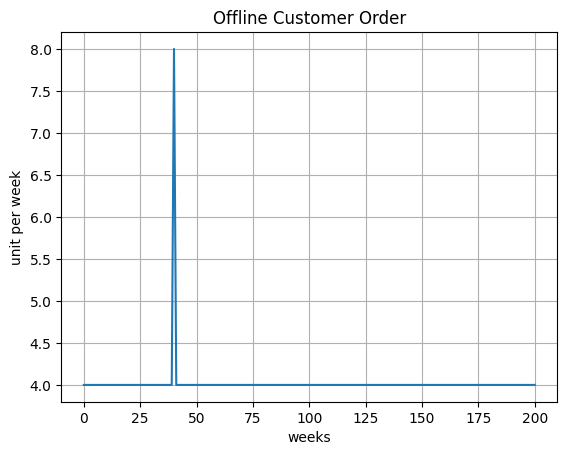

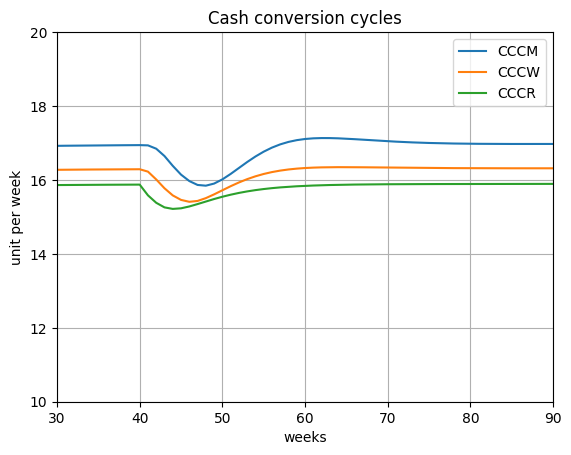

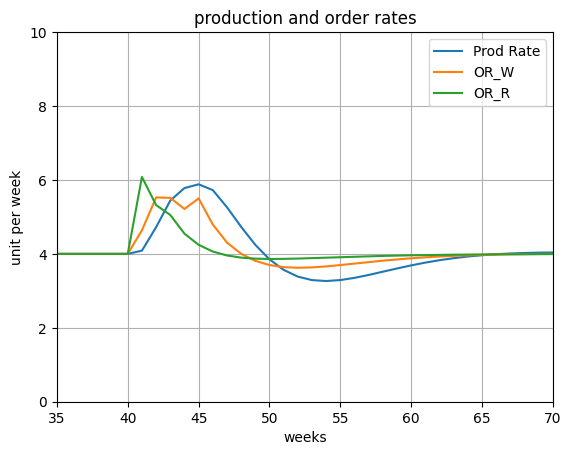

variance of CCC and  production or order rate
CCCM                              0.168387
CCCW                              0.093893
CCCR                              0.047909
production rate                   0.429660
OrderRateW                        0.245052
OrderRateR                        0.178538
wholesaler amount to order WOP    0.252861
retailer amount to order ROP      0.183051
Offline Customer Order            0.380952
dtype: float64
Cash flow bullwhip and BWE values
CFB_M=  0.6659272052559757
CFB_W=  0.5129331883135981
CFB_R=  0.12576034083511536
BWE_M=  1.6991929043938208
BWE_W=  1.3387070051703538
BWE_R=  0.468662802352687


In [ ]:
vmodel_PI = pysd.read_vensim('DCSC12PulseIncrease.mdl')
temp_PI = vmodel_PI.run()
# import matplotlib.pyplot as plt
temp_PI["Offline Customer Order"].plot()
plt.title("Offline Customer Order")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.show()
#storing the data in another series data_PI
data_PI = vmodel_PI.run(return_columns=['CCCM', 'CCCW', 'CCCR','production rate', 'OrderRateW','OrderRateR', 'wholesaler amount to order WOP', 'retailer amount to order ROP', 'Offline Customer Order' ])
temp_PI["CCCM"].plot(label='CCCM')
temp_PI["CCCW"].plot(label='CCCW')
temp_PI["CCCR"].plot(label='CCCR')
plt.title("Cash conversion cycles")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(10, 20)  # Set y-axis limits
plt.xlim(30, 90) # Set x-axis limits
plt.show()

temp_PI["production rate"].plot(label='Prod Rate')
temp_PI["OrderRateW"].plot(label='OR_W')
temp_PI["OrderRateR"].plot(label='OR_R')
plt.title("production and order rates")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(00, 10)  # Set y-axis limits
plt.xlim(35, 70) # Set x-axis limits
plt.show()

#we cut down the dataset from certain rows to till certain other rows in the datasubset pandas series
data_subset_PI = data_PI.iloc[38:80]
var_data_PI = data_subset_PI.var()
print("""variance of CCC and  production or order rate""")
print(var_data_PI)
CFB_M = var_data_PI['CCCM'] / var_data_PI['wholesaler amount to order WOP']
CFB_W = var_data_PI['CCCW'] / var_data_PI['retailer amount to order ROP']
CFB_R = var_data_PI['CCCR'] / var_data_PI['Offline Customer Order']
BWE_M = var_data_PI['production rate'] / var_data_PI['wholesaler amount to order WOP']
BWE_W = var_data_PI['OrderRateW'] / var_data_PI['retailer amount to order ROP']
BWE_R = var_data_PI['OrderRateR'] / var_data_PI['Offline Customer Order']
print("Cash flow bullwhip and BWE values")
print('CFB_M= ', CFB_M)
print('CFB_W= ', CFB_W)
print('CFB_R= ', CFB_R)
print('BWE_M= ', BWE_M)
print('BWE_W= ', BWE_W)
print('BWE_R= ', BWE_R)

#4. PulseDecrease

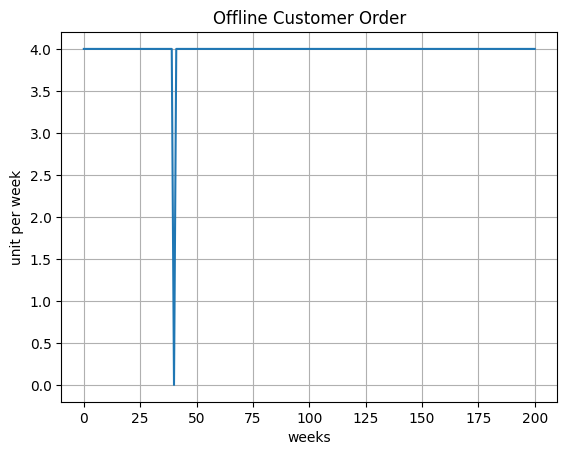

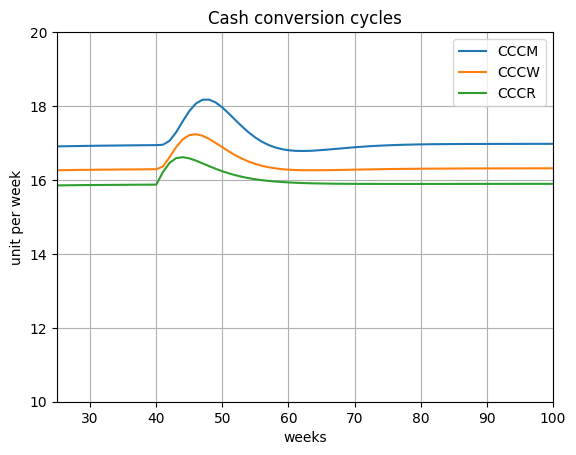

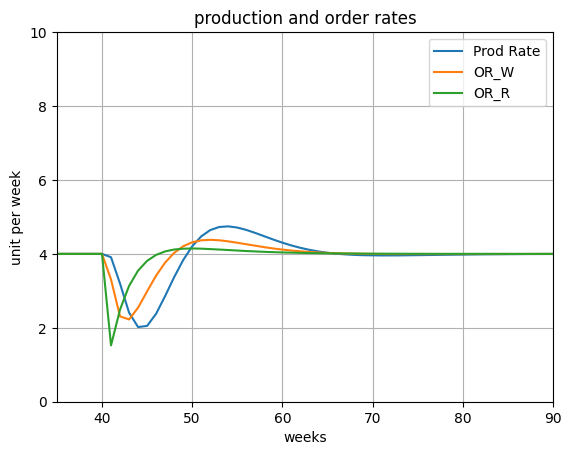

variance of CCC and  production or order rate
CCCM                              0.235441
CCCW                              0.118781
CCCR                              0.062056
production rate                   0.594718
OrderRateW                        0.339218
OrderRateR                        0.291759
wholesaler amount to order WOP    0.339218
retailer amount to order ROP      0.291759
Offline Customer Order            0.500000
dtype: float64
Cash flow bullwhip and BWE values
CFB_M=  0.6940713260545675
CFB_W=  0.40712046099783245
CFB_R=  0.1241124554027481
BWE_M=  1.7532031637702998
BWE_W=  1.1626631849833127
BWE_R=  0.583518661876245


In [ ]:
# #PulseDecrease
vmodel_PD = pysd.read_vensim('DCSC12PulseDecrease.mdl')
temp_PD = vmodel_PD.run()
# import matplotlib.pyplot as plt
temp_PD["Offline Customer Order"].plot()
plt.title("Offline Customer Order")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.show()
#storing the data in another series data_PD
data_PD = vmodel_PD.run(return_columns=['CCCM', 'CCCW', 'CCCR','production rate', 'OrderRateW','OrderRateR', 'wholesaler amount to order WOP', 'retailer amount to order ROP', 'Offline Customer Order' ])
temp_PD["CCCM"].plot(label='CCCM')
temp_PD["CCCW"].plot(label='CCCW')
temp_PD["CCCR"].plot(label='CCCR')
plt.title("Cash conversion cycles")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(10, 20)  # Set y-axis limits
plt.xlim(25, 100) # Set x-axis limits
plt.show()

temp_PD["production rate"].plot(label='Prod Rate')
temp_PD["OrderRateW"].plot(label='OR_W')
temp_PD["OrderRateR"].plot(label='OR_R')
plt.title("production and order rates")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(00, 10)  # Set y-axis limits
plt.xlim(35, 90) # Set x-axis limits
plt.show()
#we cut down the dataset from certain rows to till certain other rows in the datasubset pandas series
data_subset_PD = data_PD.iloc[38:70]
# print(data_subsetRN)
var_data_PD = data_subset_PD.var()
print("""variance of CCC and  production or order rate""")
print(var_data_PD)
CFB_M = var_data_PD['CCCM'] / var_data_PD['wholesaler amount to order WOP']
CFB_W = var_data_PD['CCCW'] / var_data_PD['retailer amount to order ROP']
CFB_R = var_data_PD['CCCR'] / var_data_PD['Offline Customer Order']
BWE_M = var_data_PD['production rate'] / var_data_PD['wholesaler amount to order WOP']
BWE_W = var_data_PD['OrderRateW'] / var_data_PD['retailer amount to order ROP']
BWE_R = var_data_PD['OrderRateR'] / var_data_PD['Offline Customer Order']
print("Cash flow bullwhip and BWE values")
print('CFB_M= ', CFB_M)
print('CFB_W= ', CFB_W)
print('CFB_R= ', CFB_R)
print('BWE_M= ', BWE_M)
print('BWE_W= ', BWE_W)
print('BWE_R= ', BWE_R)


# 5. RandomNormal

This result is based on random normal demand from 40 to 60 weeks

 4 + (RANDOM NORMAL(0, 4 , 2.5 , 10 , 10 ))*PULSE( 40 , 20 )

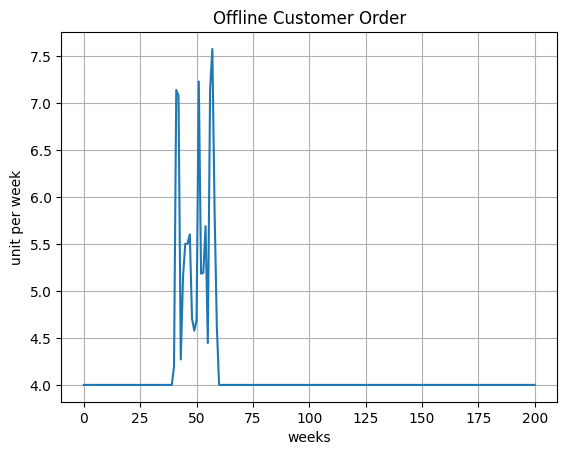

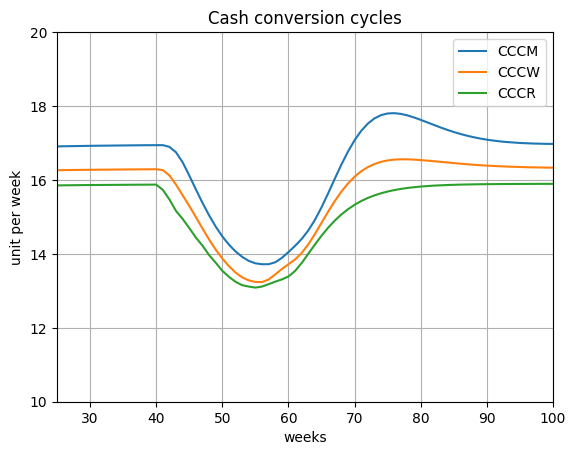

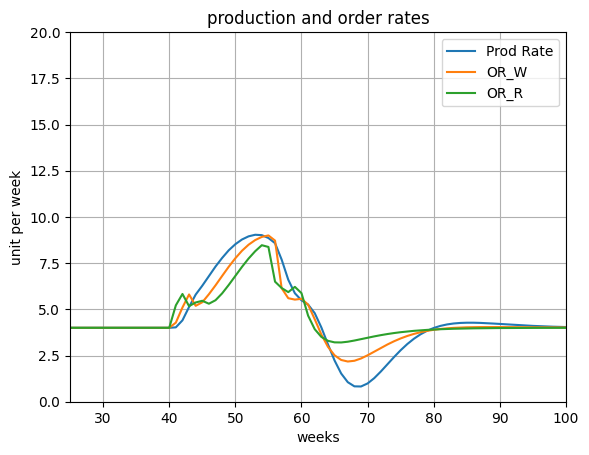

variance of CCC and  production or order rate
CCCM                              2.544247
CCCW                              1.797882
CCCR                              1.305968
production rate                   7.290635
OrderRateW                        4.616253
OrderRateR                        2.714572
wholesaler amount to order WOP    4.311193
retailer amount to order ROP      2.301623
Offline Customer Order            2.087400
dtype: float64
Cash flow bullwhip and BWE values
CFB_M=  0.5901491333937329
CFB_W=  0.7811366527773599
CFB_R=  0.6256434902006005
BWE_M=  1.6910945538640179
BWE_W=  2.0056508287379597
BWE_R=  1.3004556776301937


In [ ]:
vmodel_RN = pysd.read_vensim('DCSC12RandomNormal.mdl')
temp_RN = vmodel_RN.run()
# import matplotlib.pyplot as plt
temp_RN["Offline Customer Order"].plot()
plt.title("Offline Customer Order")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.show()
#storing the data in another series data_RN
data_RN = vmodel_RN.run(return_columns=['CCCM', 'CCCW', 'CCCR','production rate', 'OrderRateW','OrderRateR', 'wholesaler amount to order WOP', 'retailer amount to order ROP', 'Offline Customer Order' ])
temp_RN["CCCM"].plot(label='CCCM')
temp_RN["CCCW"].plot(label='CCCW')
temp_RN["CCCR"].plot(label='CCCR')
plt.title("Cash conversion cycles")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(10, 20)  # Set y-axis limits
plt.xlim(25, 100) # Set x-axis limits
plt.show()
temp_RN["production rate"].plot(label='Prod Rate')
temp_RN["OrderRateW"].plot(label='OR_W')
temp_RN["OrderRateR"].plot(label='OR_R')
plt.title("production and order rates")
plt.ylabel("unit per week")
plt.xlabel("weeks")
plt.grid()
plt.legend()
plt.ylim(00, 20)  # Set y-axis limits
plt.xlim(25, 100) # Set x-axis limits
plt.show()
#we cut down the dataset from certain rows to till certain other rows in the datasubset pandas series
data_subset_RN = data_RN.iloc[38:90]
# print(data_subsetRN)
var_data_RN = data_subset_RN.var()
print("""variance of CCC and  production or order rate""")
print(var_data_RN)
CFB_M = var_data_RN['CCCM'] / var_data_RN['wholesaler amount to order WOP']
CFB_W = var_data_RN['CCCW'] / var_data_RN['retailer amount to order ROP']
CFB_R = var_data_RN['CCCR'] / var_data_RN['Offline Customer Order']
BWE_M = var_data_RN['production rate'] / var_data_RN['wholesaler amount to order WOP']
BWE_W = var_data_RN['OrderRateW'] / var_data_RN['retailer amount to order ROP']
BWE_R = var_data_RN['OrderRateR'] / var_data_RN['Offline Customer Order']
print("Cash flow bullwhip and BWE values")
print('CFB_M= ', CFB_M)
print('CFB_W= ', CFB_W)
print('CFB_R= ', CFB_R)
print('BWE_M= ', BWE_M)
print('BWE_W= ', BWE_W)
print('BWE_R= ', BWE_R)


# Observations

* Variance of CCC of upstream players increase as we compare them with
downstream players
* Variance of order rate (or production rate in case of Manufacturer) is more as we move upstream.
* While in calculation of BWE and CFB,
  * we observe that the CFB and BWE has higher values for Manufacturer in case of PULSE_Increase and PULSE_Decrease demand only.
  * CFB and BWE are either missing or undefined for constant demand